In [13]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime


In [5]:
file = Path('Resources/2022_lottery_data.csv')

df_2022 = pd.read_csv(file)
df_2022['month'] = pd.to_datetime(df_2022['date']).dt.month
df_2022

,date,weekday,winning_numbers,powerball,powerplay,jackpot,month
0,1/1/2022,Sat,6-12-39-48-50,7,2,5.000000e+08,1
1,1/3/2022,Mon,2-13-32-33-48,22,2,5.400000e+08,1
2,1/5/2022,Wed,6-14-25-33-46,17,2,6.300000e+08,1
3,1/8/2022,Sat,20-21-36-60-65,13,10,2.000000e+07,1
4,1/10/2022,Mon,14-17-18-21-27,9,2,2.700000e+07,1
...,...,...,...,...,...,...,...
127,10/24/2022,Mon,18-23-35-45-54,16,4,6.250000e+08,10
128,10/26/2022,Wed,19-36-37-46-56,24,2,7.000000e+08,10
129,10/29/2022,Sat,19-31-40-46-57,23,3,8.250000e+08,10
130,10/31/2022,Mon,13-19-36-39-59,13,3,1.000000e+09,10


In [14]:
#year mode for powerball and powerplay.  Question 1
pb_counts2022 = df_2022['powerball'].mode()
pp_counts2022 = df_2022['powerplay'].mode()

modes_year_2022 = pd.merge(pb_counts2022, pp_counts2022,left_index=True, right_index=True)

modes_year_2022

,powerball,powerplay
0,16,2


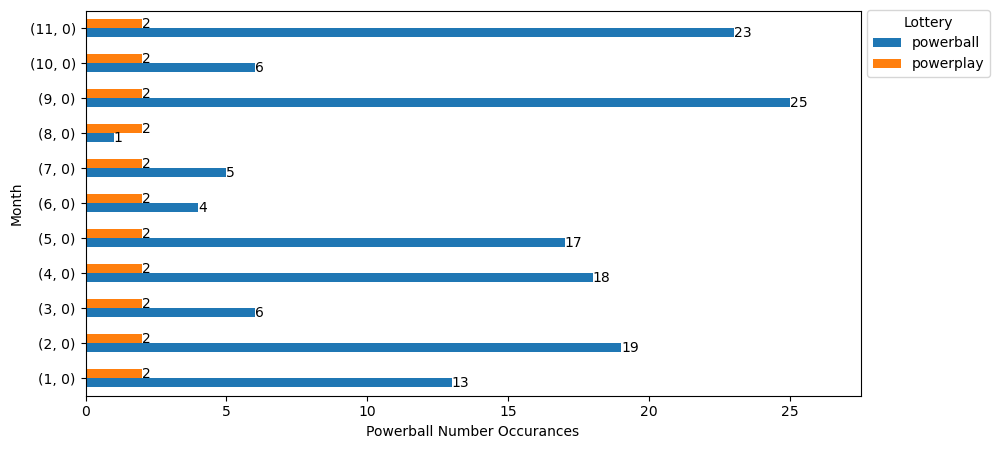

In [7]:
#month modes.  Question 2
pb_month_2022 = df_2022[['month','powerball']]
pp_month_2022 = df_2022[['month','powerplay']]

pb_month_counts2022 = pb_month_2022.groupby('month')['powerball'].apply(lambda x: x.mode())
pp_month_counts2022 = pp_month_2022.groupby('month')['powerplay'].apply(lambda x: x.mode())

modes_month_2022 = pd.merge(pb_month_counts2022, pp_month_counts2022,left_index=True, right_index=True)

data = modes_month_2022.plot(kind = 'barh', ylabel = 'Month', figsize = (10,5))
data.set(xlabel = 'Powerball Number Occurances')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


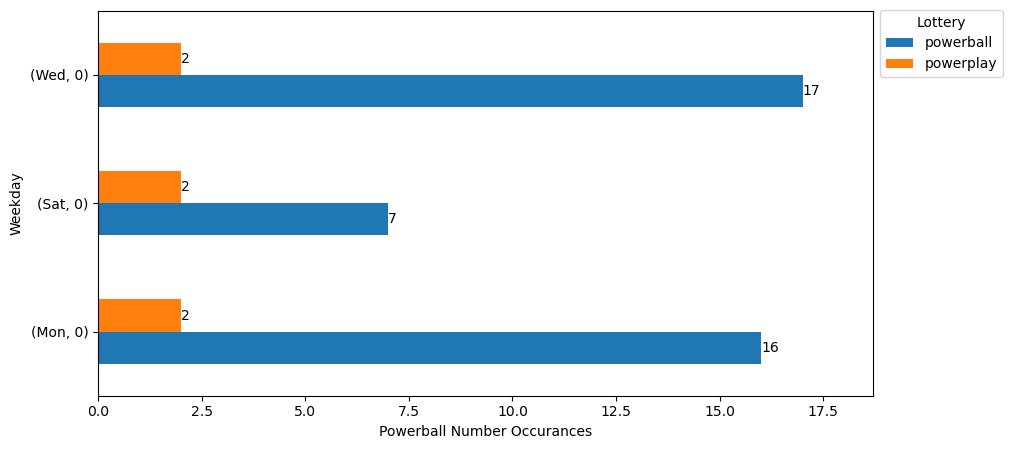

In [8]:
#day modes.  Question 3
pb_day_2022 = df_2022[['weekday','powerball']]
pp_day_2022 = df_2022[['weekday','powerplay']]

pb_day_counts2022 = pb_day_2022.groupby('weekday')['powerball'].apply(lambda x: x.mode())
pp_day_counts2022 = pp_day_2022.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

modes_day_2022 = pd.merge(pb_day_counts2022, pp_day_counts2022,left_index=True, right_index=True)

data = modes_day_2022.plot(kind = 'barh', ylabel = 'Weekday', figsize = (10,5))
data.set(xlabel = 'Powerball Number Occurances')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')



In [9]:
#day highest median jackpot
day_jackpot_2022df = df_2022[['weekday','jackpot']]

day_jackpot2022amt = day_jackpot_2022df.groupby('weekday')['jackpot'].median().max()
day_jackpot2022day = day_jackpot_2022df.groupby('weekday')['jackpot'].median().idxmax()

print(day_jackpot2022day, day_jackpot2022amt)


Wed 162500000.0


In [10]:
#highest dollar months, top 5.  Question 4
months_2022df = df_2022[['month','jackpot']]

months_sums2022 = months_2022df.groupby('month')['jackpot'].apply(lambda x: x.sum())
months_list2022 = months_sums2022.sort_values(ascending = False)

months_list2022.head(5)


month
11    1.200000e+11
10    7.383000e+09
4     3.879000e+09
6     3.423000e+09
9     2.631000e+09
Name: jackpot, dtype: float64

In [11]:
#highest dollar day.  Question 5
days_2022df = df_2022[['weekday','jackpot']]

days_sums2022 = days_2022df.groupby('weekday')['jackpot'].apply(lambda x: x.sum())
days_list2022 = days_sums2022.sort_values(ascending = False)

